In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [9]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [10]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [12]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [13]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Tomato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Peach___Bacterial_spot', 'Tomato___Septoria_leaf_spot']
38
['Tomato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Peach___Bacterial_spot', 'Tomato___Septoria_leaf_spot']
38
['Tomato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Peach___Bacterial_spot', 'Tomato___Septoria_leaf_spot']


In [14]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['61a531ba-3d52-4af3-8828-c2dbba4d3b1d___Mt.N.V_HL 8941.JPG', 'fdf4cdd9-cb41-42de-a73e-87301576fade___Mt.N.V_HL 9000.JPG', 'f0a897af-a598-493e-962b-849709155dfd___Mt.N.V_HL 6091.JPG', 'ca090e78-ff31-4715-82eb-b63e20b0e156___Mt.N.V_HL 9081.JPG', '605f6929-3bb5-419c-8bee-eccc39128245___Mt.N.V_HL 9059.JPG']


In [15]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


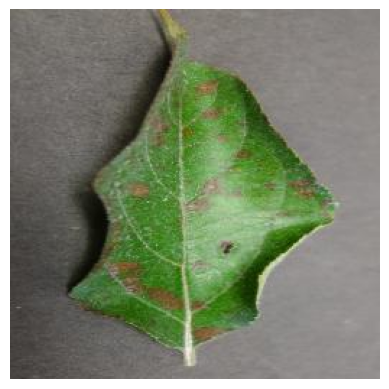

In [31]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/11a41b2a-5bf3-458a-801c-0898dd280c1e___FREC_C.Rust 9874.JPG'

img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [18]:
img_size = 224
batch_size = 32

In [19]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [20]:
# Train Generator

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [21]:
# Validation Generator

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [22]:
# Model Definition

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(255, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [23]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 255)               4

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 [==============================] - 106s 78ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.6556 - val_accuracy: 0.8709
Epoch 2/5
1358/1358 [==============================] - 108s 80ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.7004 - val_accuracy: 0.8702
Epoch 3/5
1358/1358 [==============================] - 99s 73ms/step - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.7659 - val_accuracy: 0.8583
Epoch 4/5
1358/1358 [==============================] - 100s 74ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.6934 - val_accuracy: 0.8791
Epoch 5/5
1358/1358 [==============================] - 101s 74ms/step - loss: 0.0364 - accuracy: 0.9895 - val_loss: 0.8671 - val_accuracy: 0.8620


In [52]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 19s 56ms/step - loss: 0.8667 - accuracy: 0.8621
Validation Accuracy: 86.21%


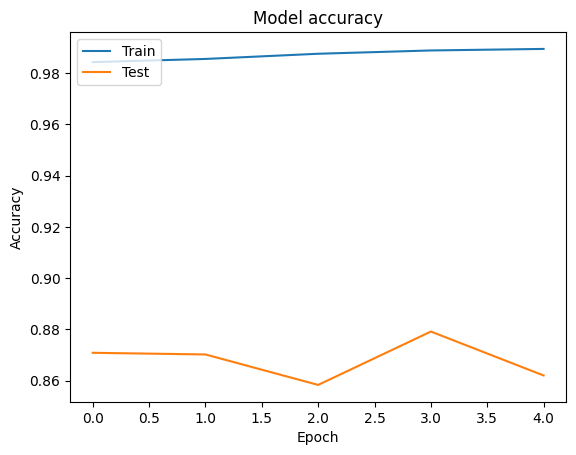

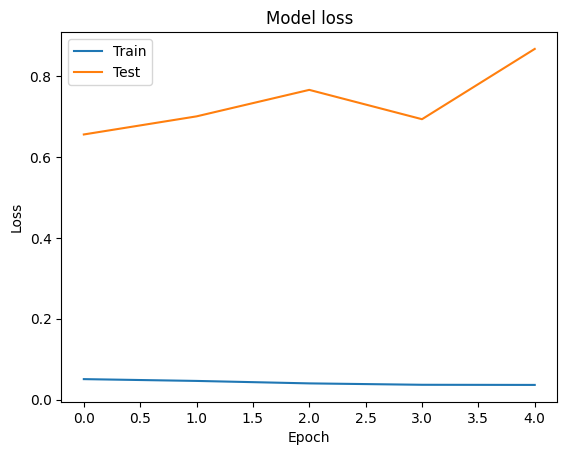

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array


def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [55]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [56]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [57]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [67]:
# Examle usage

image_path = '/content/test2.jpg'

predicted_class_name = predict_image_class(model, image_path, class_indices)

print("Predicted class name:", predicted_class_name)

1/1 [==============================] - 0s 18ms/step
Predicted class name: Apple___Black_rot


In [66]:
image_path = '/content/test4.jpg'

predicted_class_name = predict_image_class(model, image_path, class_indices)

print("Predicted class name:", predicted_class_name)

1/1 [==============================] - 0s 18ms/step
Predicted class name: Strawberry___Leaf_scorch


In [68]:
model.save('plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
